In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="6"

import sys
sys.path.append("../")

import mitsuba as mi
import drjit as dr
from matplotlib import pyplot as plt
import numpy as np
import skimage as ski
from helpers.polarization_helpers import *
from helpers.render_helpers import *
from helpers.hair_color_helpers import *

print(mi.variants())
mi.set_variant("cuda_ad_spectral_polarized")
dr.set_flag(dr.JitFlag.Debug, True)

['scalar_rgb', 'scalar_spectral', 'scalar_spectral_polarized', 'llvm_ad_rgb', 'llvm_ad_mono', 'llvm_ad_mono_polarized', 'llvm_ad_spectral', 'llvm_ad_spectral_polarized', 'cuda_ad_rgb', 'cuda_ad_mono', 'cuda_ad_mono_polarized', 'cuda_ad_spectral', 'cuda_ad_spectral_polarized']


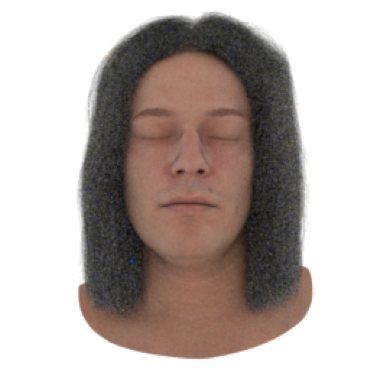

In [ ]:
scene = mi.load_file("../../scenes/marcus_light_sphere_hair.xml", res=256)
image = np.clip(render_from_angle(scene, 75, 0.5*np.pi, 0.5*np.pi, polarized=True, spp=128).squeeze()[0], 0.0, 1.0)

plt.axis("off")
plt.imshow(image ** (1.0 / 2.2))
plt.show()

In [19]:
params = mi.traverse(scene)
print(params)

SceneParameters[
  -------------------------------------------------------------------------------------------------------------------
  Name                                                            Flags    Type              Parent
  -------------------------------------------------------------------------------------------------------------------
  sensor.near_clip                                                         float             PerspectiveCamera
  sensor.far_clip                                                          float             PerspectiveCamera
  sensor.shutter_open                                                      float             PerspectiveCamera
  sensor.shutter_open_time                                                 float             PerspectiveCamera
  sensor.film.size                                                         ScalarVector2u    HDRFilm
  sensor.film.crop_size                                                    ScalarVector2u    HDRFilm
 